<a href="https://colab.research.google.com/github/cm180697/Portfolio/blob/main/Entrega_Semana_6_ML_Camilo_Mateus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset from a CSV file
diabetes = pd.read_csv('diabetes.csv')

# Split the data into training and testing sets
X = diabetes.drop('Y', axis=1)  # drop the target variable from the features
y = diabetes['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the variables
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Apply L1 regularization with Lasso regression
lasso = Lasso(alpha=0.1)  # set the regularization parameter alpha to 0.1
lasso.fit(X_train_std, y_train)  # fit the Lasso model to the standardized training data
lasso_coef = lasso.coef_  # get the coefficients of the Lasso model

# Apply L2 regularization with Ridge regression
ridge = Ridge(alpha=0.1)  # set the regularization parameter alpha to 0.1
ridge.fit(X_train_std, y_train)  # fit the Ridge model to the standardized training data
ridge_coef = ridge.coef_  # get the coefficients of the Ridge model

# Evaluate the performance of the models on the testing set
lasso_predictions = lasso.predict(X_test_std)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_predictions = ridge.predict(X_test_std)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

# Print the results
print("Lasso coefficients:\n\n", lasso_coef)
print("Ridge coefficients:\n\n", ridge_coef)
print("\n\nLasso mean squared error: %.2f" % lasso_mse)
print("\n\nRidge mean squared error: %.2f" % ridge_mse)

# Calculate the coefficients of the Lasso and Ridge models in the original scale of the features
lasso_coef_orig = lasso.coef_ * scaler.scale_
ridge_coef_orig = ridge.coef_ * scaler.scale_

# Print the results
print("\n\nLasso coefficients in original units:\n", lasso_coef_orig)
print("\n\nRidge coefficients in original units:\n", ridge_coef_orig)


Lasso coefficients:

 [ -1.48349699 -11.35039895  27.68215364  14.11862915 -21.17533224
   7.33278237  -3.25509207   6.71737865  31.92829186   2.07914476]
Ridge coefficients:

 [ -1.71305915 -11.57764735  27.51878092  14.35992219 -30.36337436
  14.59373778   0.77524287   8.05797766  35.49278238   2.13174384]


Lasso mean squared error: 3434.54


Ridge mean squared error: 3425.01


Lasso coefficients in original units:
 [ -19.7757052    -5.67335464  125.55479649  192.93379251 -725.03687327
  220.50967367  -41.72453159    8.7472685    17.1566504    24.76737553]


Ridge coefficients in original units:
 [  -22.83587556    -5.78694191   124.81380543   196.23110851
 -1039.63261415   438.85938405     9.93724442    10.49297618
    19.07202746    25.39395106]


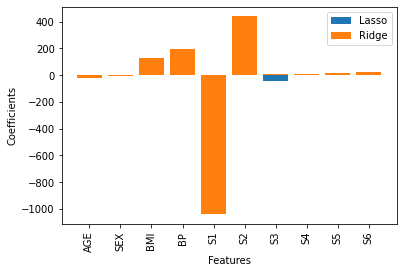

In [11]:
import matplotlib.pyplot as plt

# Plot the coefficients of the Lasso and Ridge models
fig, ax = plt.subplots()
ax.bar(range(len(lasso_coef_orig)), lasso_coef_orig, label='Lasso')
ax.bar(range(len(ridge_coef_orig)), ridge_coef_orig, label='Ridge')
ax.set_xticks(range(len(diabetes.columns) - 1))
ax.set_xticklabels(diabetes.columns[:-1], rotation=90)
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
plt.show()

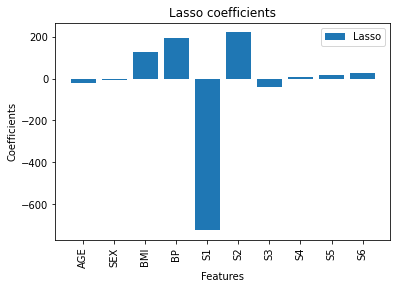

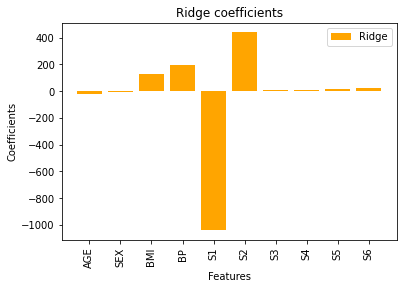

In [13]:
import matplotlib.pyplot as plt

# Plot the coefficients of the Lasso model
fig, ax = plt.subplots()
ax.bar(range(len(lasso_coef_orig)), lasso_coef_orig, label='Lasso')
ax.set_xticks(range(len(diabetes.columns) - 1))
ax.set_xticklabels(diabetes.columns[:-1], rotation=90)
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
ax.set_title('Lasso coefficients')
plt.show()

# Plot the coefficients of the Ridge model
fig, ax = plt.subplots()
ax.bar(range(len(ridge_coef_orig)), ridge_coef_orig, color='orange', label='Ridge')
ax.set_xticks(range(len(diabetes.columns) - 1))
ax.set_xticklabels(diabetes.columns[:-1], rotation=90)
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
ax.set_title('Ridge coefficients')
plt.show()


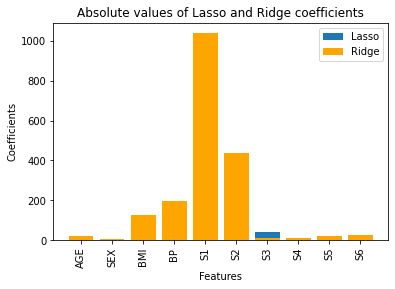

In [14]:
import matplotlib.pyplot as plt

# Get the absolute values of the Lasso and Ridge coefficients
lasso_coef_abs = abs(lasso_coef_orig)
ridge_coef_abs = abs(ridge_coef_orig)

# Plot the absolute values of the Lasso and Ridge coefficients
fig, ax = plt.subplots()
ax.bar(range(len(lasso_coef_abs)), lasso_coef_abs, label='Lasso')
ax.bar(range(len(ridge_coef_abs)), ridge_coef_abs, color='orange', label='Ridge')
ax.set_xticks(range(len(diabetes.columns) - 1))
ax.set_xticklabels(diabetes.columns[:-1], rotation=90)
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
ax.set_title('Absolute values of Lasso and Ridge coefficients')
plt.show()


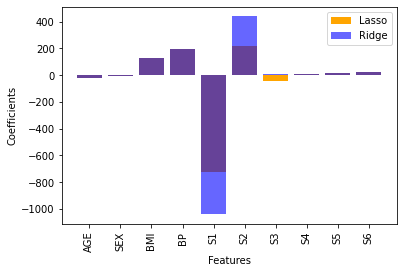

In [26]:
import matplotlib.pyplot as plt

# Plot the coefficients of the Lasso and Ridge models with translucent bars
fig, ax = plt.subplots()
ax.bar(range(len(lasso_coef_orig)), lasso_coef_orig, alpha=1, label='Lasso',color='orange',)
ax.bar(range(len(ridge_coef_orig)), ridge_coef_orig, alpha=0.6, color='blue', label='Ridge')
ax.set_xticks(range(len(diabetes.columns) - 1))
ax.set_xticklabels(diabetes.columns[:-1], rotation=90)
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
plt.show()


In [2]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset from a CSV file
diabetes = pd.read_csv('diabetes.csv')

# Split the data into training and testing sets
X = diabetes.drop('Y', axis=1)  # drop the target variable from the features
y = diabetes['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the variables
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Set up a grid of alpha values to test
alphas = np.logspace(-4, 0, 100)

# Set up a dictionary of models to test
models = {
    'Lasso': Lasso(),
    'Ridge': Ridge(),
}

# Set up a dictionary of parameter grids to test
param_grids = {
    'Lasso': {'alpha': alphas},
    'Ridge': {'alpha': alphas},
}

# Set up a dictionary to store the best models
best_models = {}

# Loop over the models and parameter grids
for name, model in models.items():
    param_grid = param_grids[name]
    
    # Set up a grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    
    # Fit the grid search to the training data
    grid_search.fit(X_train_std, y_train)
    
    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Store the best model in the dictionary
    best_models[name] = best_model
    
    # Print the results
    print("{}:\n Best alpha = {:.4f}, Best negative mean squared error = {:.2f}\n".format(
        name, best_params['alpha'], -grid_search.best_score_))

# Evaluate the performance of the best models on the testing set
lasso_predictions = best_models['Lasso'].predict(X_test_std)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_predictions = best_models['Ridge'].predict(X_test_std)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

# Print the results
print("\n\nLasso mean squared error: %.2f" % lasso_mse)
print("\n\nRidge mean squared error: %.2f" % ridge_mse)

# Calculate the coefficients of the Lasso and Ridge models in the original scale of the features
lasso_coef_orig = best_models['Lasso'].coef_ * scaler.scale_
ridge_coef_orig = best_models['Ridge'].coef_ * scaler.scale_

# Print the results
print("\n\nLasso coefficients in original units:\n", lasso_coef_orig)
print("\n\nRidge coefficients in original units:\n", ridge_coef_orig)


Lasso:
 Best alpha = 0.4329, Best negative mean squared error = 2863.35

Ridge:
 Best alpha = 1.0000, Best negative mean squared error = 2877.81



Lasso mean squared error: 3434.83


Ridge mean squared error: 3430.11


Lasso coefficients in original units:
 [ -12.33755651   -5.35678768  125.79718752  184.57506064 -356.48784281
   -0.         -110.23176408    4.61638438   15.07923156   21.77213382]


Ridge coefficients in original units:
 [ -22.0175389    -5.75498066  125.005372    195.11326955 -836.48129155
  299.25877957  -24.69432695    9.37975717   17.78094662   26.17527579]


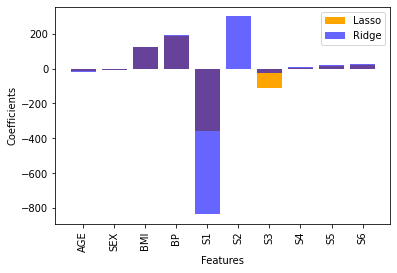

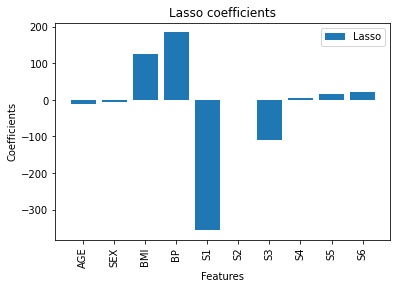

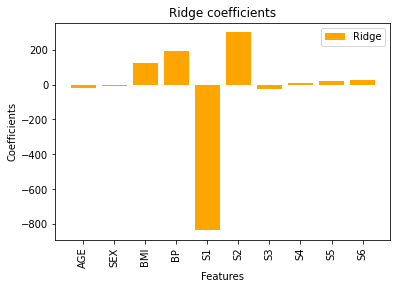

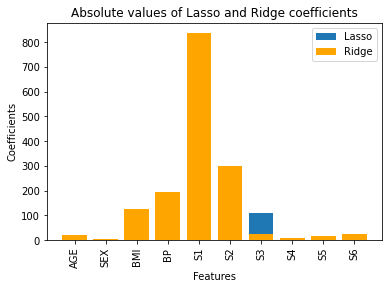

In [4]:
import matplotlib.pyplot as plt

# Plot the coefficients of the Lasso and Ridge models with translucent bars
fig, ax = plt.subplots()
ax.bar(range(len(lasso_coef_orig)), lasso_coef_orig, alpha=1, label='Lasso',color='orange',)
ax.bar(range(len(ridge_coef_orig)), ridge_coef_orig, alpha=0.6, color='blue', label='Ridge')
ax.set_xticks(range(len(diabetes.columns) - 1))
ax.set_xticklabels(diabetes.columns[:-1], rotation=90)
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
plt.show()

import matplotlib.pyplot as plt

# Plot the coefficients of the Lasso model
fig, ax = plt.subplots()
ax.bar(range(len(lasso_coef_orig)), lasso_coef_orig, label='Lasso')
ax.set_xticks(range(len(diabetes.columns) - 1))
ax.set_xticklabels(diabetes.columns[:-1], rotation=90)
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
ax.set_title('Lasso coefficients')
plt.show()

# Plot the coefficients of the Ridge model
fig, ax = plt.subplots()
ax.bar(range(len(ridge_coef_orig)), ridge_coef_orig, color='orange', label='Ridge')
ax.set_xticks(range(len(diabetes.columns) - 1))
ax.set_xticklabels(diabetes.columns[:-1], rotation=90)
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
ax.set_title('Ridge coefficients')
plt.show()

import matplotlib.pyplot as plt

# Get the absolute values of the Lasso and Ridge coefficients
lasso_coef_abs = abs(lasso_coef_orig)
ridge_coef_abs = abs(ridge_coef_orig)

# Plot the absolute values of the Lasso and Ridge coefficients
fig, ax = plt.subplots()
ax.bar(range(len(lasso_coef_abs)), lasso_coef_abs, label='Lasso')
ax.bar(range(len(ridge_coef_abs)), ridge_coef_abs, color='orange', label='Ridge')
ax.set_xticks(range(len(diabetes.columns) - 1))
ax.set_xticklabels(diabetes.columns[:-1], rotation=90)
ax.legend()
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')
ax.set_title('Absolute values of Lasso and Ridge coefficients')
plt.show()
